# Import necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib notebook
pd.get_option("display.max_column")
pd.get_option("display.max_rows",None)
import warnings
warnings.filterwarnings('ignore')

# 1- Districts datasets


## 1.1- Import and Explore Districts 

In [2]:
districts_df= pd.read_csv('../districts_info.csv')
districts_df.head(5)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
districts_df.shape

(233, 7)

In [4]:
districts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [5]:
districts_df.describe(include=['float','object','int'])

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
count,233.000000,176,176,176,148,162,118
unique,NaN,23,4,5,5,2,11
top,NaN,Connecticut,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
freq,NaN,30,104,116,48,161,30
mean,5219.776824,NaN,NaN,NaN,NaN,NaN,NaN
std,2595.751581,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2991.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4937.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,7660.000000,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2- District data frame cleaning
      -change "district_id" data type into object
      -delete records where there are the most nan values
      -modify the last 4 columns
      -replace the "NaN" values in the last 4 columns of each column 

In [6]:
#change "district_id" data type into object.

districts_df['district_id']= districts_df['district_id'].astype('str')
districts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    object
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: object(7)
memory usage: 12.9+ KB


In [7]:
#delete records where there are the most non value

#see how many values are in each column
districts_df.isnull().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [8]:
#Delete rows containing either 75% or more Nan Values

perc = 75
min_count = int(((100-perc)/100)*districts_df.shape[1]+1)
districts_df = districts_df.dropna(axis=0, thresh=min_count)

districts_df.isnull().sum()

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            28
county_connections_ratio    14
pp_total_raw                58
dtype: int64

In [9]:
districts_df.head(5)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


In [10]:
#modify the last 4 columns

mapping_1 = {'[0, 0.2[':'0%-20%', '[0.2, 0.4[': '20%-40%', '[0.4, 0.6[':'40%-60%', '[0.6, 0.8[': '60%-80%', '[0.8, 1[': '80%-100%'}
mapping_2 = {'[4000, 6000[':'4000-6000',
             '[6000, 8000[':'6000-8000',
             '[8000, 10000[':'8000-10000',
             '[10000, 12000[':'10000-12000',             
             '[12000, 14000[':'12000-14000',             
             '[14000, 16000[':'14000-16000',
             '[16000, 18000[':'16000-20000',
             '[18000, 20000[':'18000-20000',
             '[20000, 22000[':'20000-22000',
             '[22000, 24000[':'22000-24000',
             '[32000, 34000[':'32000-34000' }          
                        
mapping_3 = {'[0.18, 1[': '18%-100%', '[1, 2[': '100%-200%' }

districts_df['pct_black/hispanic'] = districts_df ['pct_black/hispanic'].map(mapping_1) 
districts_df['pct_free/reduced'] = districts_df ['pct_free/reduced'].map(mapping_1) 
districts_df['county_connections_ratio'] = districts_df ['county_connections_ratio'].map(mapping_3) 
districts_df['pp_total_raw'] = districts_df['pp_total_raw'].map(mapping_2)
districts_df.head()
                                           
                                            

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000
2,4921,Utah,Suburb,0%-20%,20%-40%,18%-100%,6000-8000
5,5987,Wisconsin,Suburb,0%-20%,0%-20%,18%-100%,10000-12000
6,3710,Utah,Suburb,0%-20%,40%-60%,18%-100%,6000-8000
7,7177,North Carolina,Suburb,20%-40%,20%-40%,18%-100%,8000-10000


In [11]:
districts_df.state.value_counts()

state
Connecticut             30
Utah                    29
Massachusetts           21
Illinois                18
California              12
Ohio                    11
New York                 8
Indiana                  7
Washington               6
Missouri                 6
Virginia                 4
North Carolina           4
Wisconsin                3
District Of Columbia     3
New Jersey               2
Texas                    2
Tennessee                2
New Hampshire            2
Michigan                 2
Minnesota                1
Arizona                  1
Florida                  1
North Dakota             1
Name: count, dtype: int64

<IPython.core.display.Javascript object>


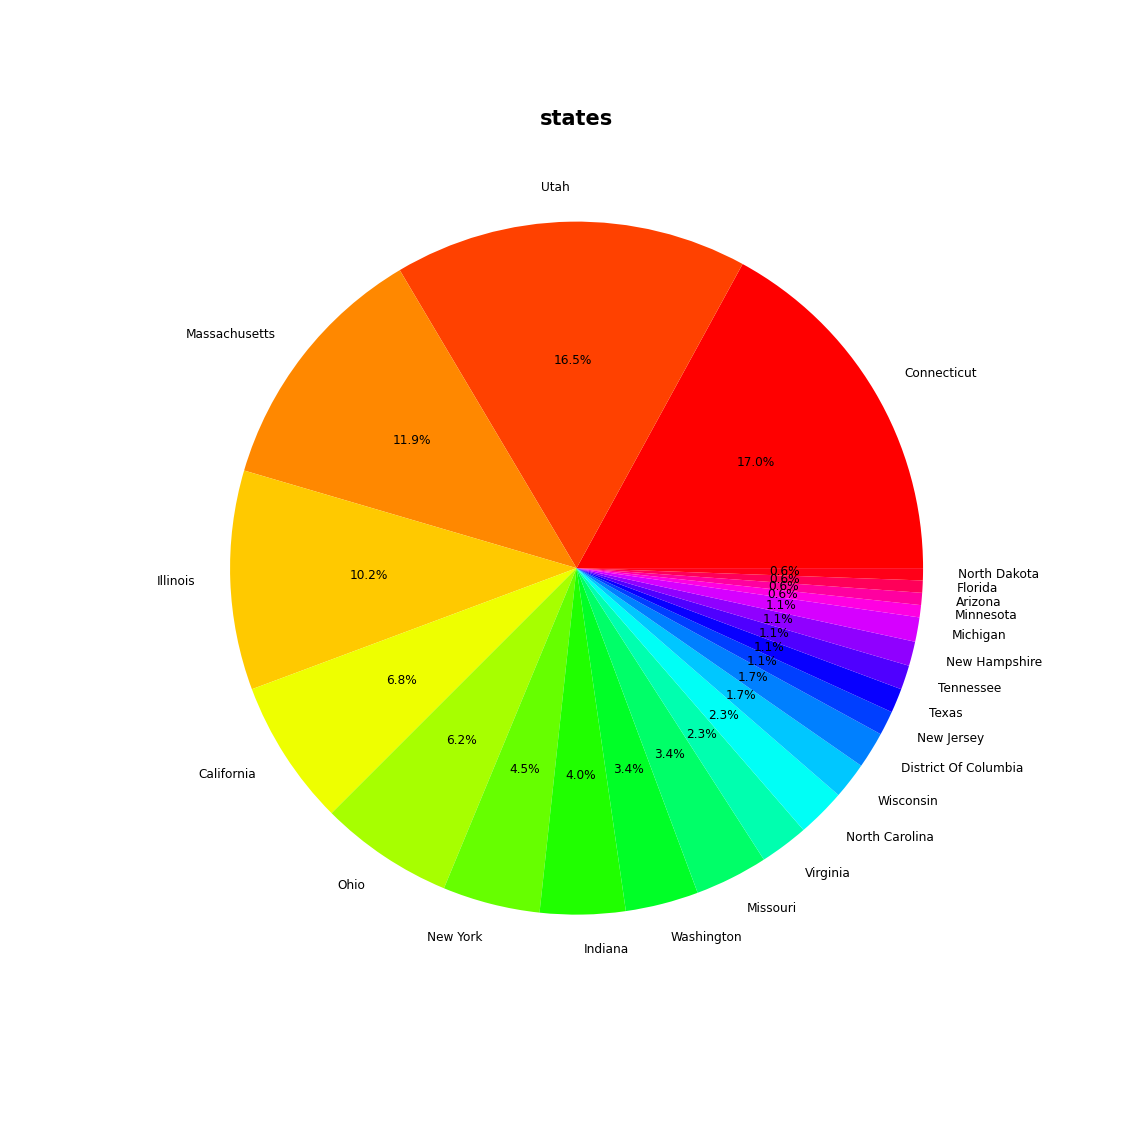

In [12]:
%matplotlib notebook

districts_df.state.value_counts().plot(kind= 'pie', figsize= (9,9), colormap= 'hsv', fontsize= 7, autopct='%1.1f%%')
plt.title('states', fontsize= 12, fontweight= 'bold')
plt.ylabel(' ')
plt.show()

In [13]:
districts_df.locale.value_counts()

locale
Suburb    104
Rural      33
City       29
Town       10
Name: count, dtype: int64

<IPython.core.display.Javascript object>


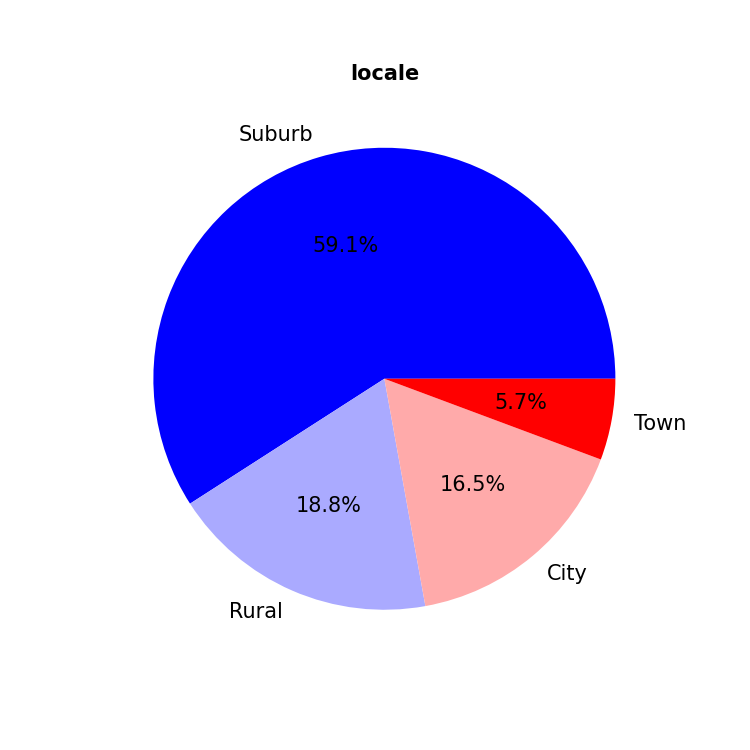

In [14]:
%matplotlib notebook

districts_df.locale.value_counts().plot(kind= 'pie', figsize= (6,6), colormap= 'bwr', fontsize= 12, autopct='%1.1f%%')
plt.title('locale', fontsize= 12, fontweight= 'bold')
plt.ylabel(' ')
plt.show()

In [15]:
districts_df['pct_black/hispanic'].value_counts()

pct_black/hispanic
0%-20%      116
20%-40%      24
40%-60%      17
60%-80%      11
80%-100%      8
Name: count, dtype: int64

<IPython.core.display.Javascript object>


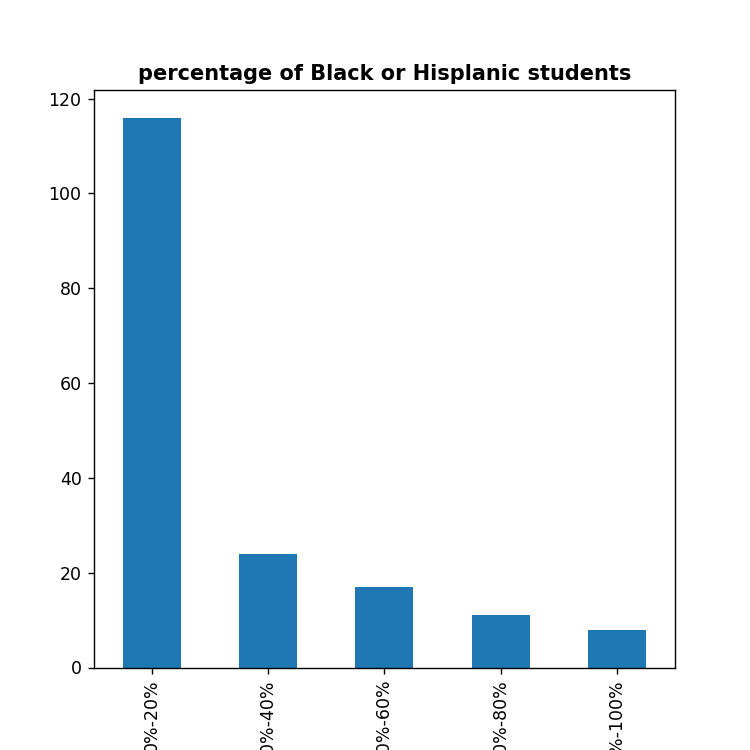

In [16]:
%matplotlib notebook

districts_df['pct_black/hispanic'].value_counts().plot(kind= 'bar', figsize= (6,6))
plt.title('percentage of Black or Hisplanic students', fontsize= 12, fontweight= 'bold')
plt.ylabel(' ')

plt.show()

<IPython.core.display.Javascript object>


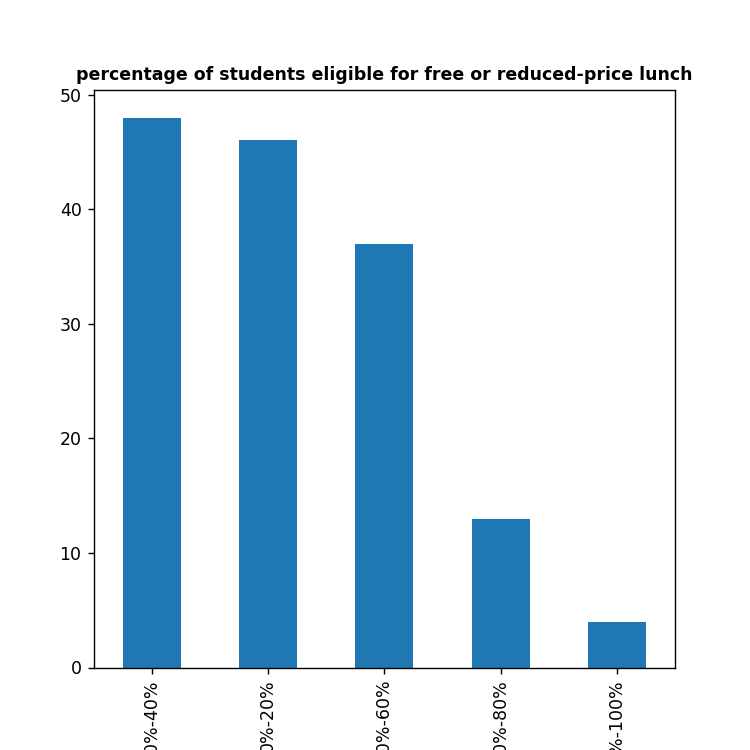

pct_free/reduced
20%-40%     48
0%-20%      46
40%-60%     37
60%-80%     13
80%-100%     4
Name: count, dtype: int64


In [17]:
%matplotlib notebook

districts_df['pct_free/reduced'].value_counts().plot(kind= 'bar', figsize= (6,6))
plt.title('percentage of students eligible for free or reduced-price lunch', fontsize= 10, fontweight= 'bold')
plt.show()

print(districts_df['pct_free/reduced'].value_counts())

In [18]:
districts_df['county_connections_ratio'].value_counts()

county_connections_ratio
18%-100%     161
100%-200%      1
Name: count, dtype: int64

<IPython.core.display.Javascript object>


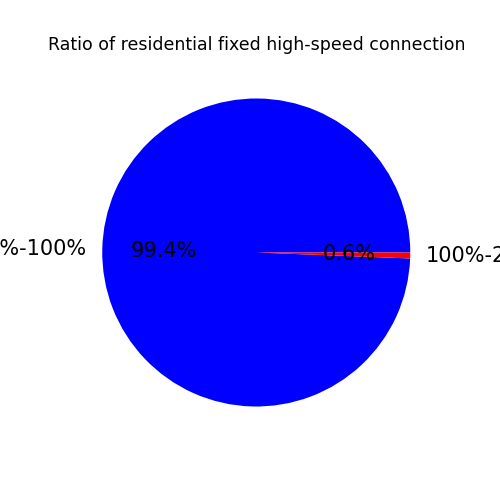

In [19]:
%matplotlib notebook

districts_df['county_connections_ratio'].value_counts().plot(kind= 'pie', figsize= (4,4), colormap= 'bwr', fontsize= 12, autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Ratio of residential fixed high-speed connection', fontsize= 10)
plt.show()

In [20]:
districts_df.pp_total_raw.value_counts()

pp_total_raw
8000-10000     30
10000-12000    17
14000-16000    15
12000-14000    15
6000-8000      13
16000-20000    13
18000-20000     8
20000-22000     2
22000-24000     2
4000-6000       2
32000-34000     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>


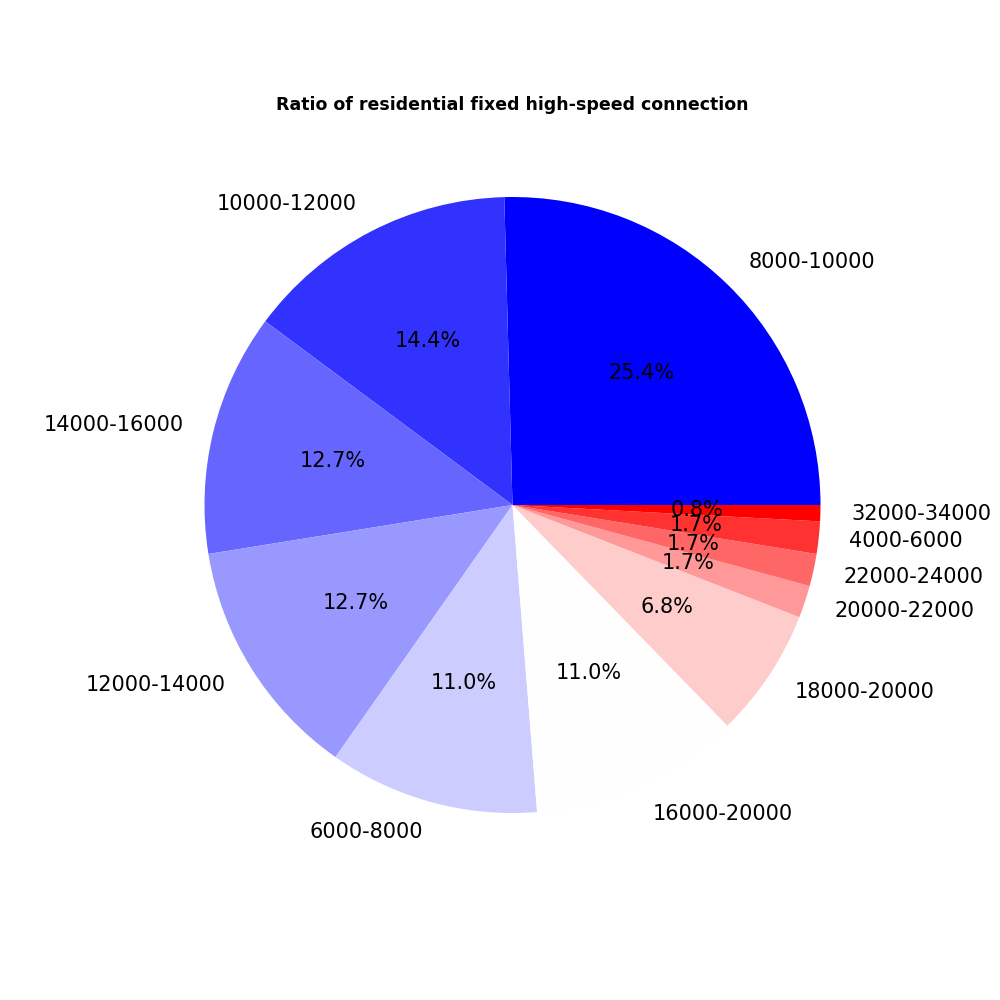

In [21]:
%matplotlib notebook

districts_df.pp_total_raw.value_counts().plot(kind= 'pie', figsize= (8,8), colormap= 'bwr', fontsize= 12, autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Ratio of residential fixed high-speed connection', fontsize= 10, fontweight= 'bold')
plt.show()

# 2- Products dataset


## 2.1- Import and Explore Products

In [22]:
products_df= pd.read_csv('../products_info.csv', skipinitialspace= True)
products_df.head(5)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [23]:
products_df.shape

(372, 6)

In [24]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [25]:
products_df.describe(include=['float','object','int'])

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
count,372.000000,372,372,371,352,352
unique,NaN,372,372,290,5,35
top,NaN,https://www.splashmath.com,SplashLearn,Google LLC,PreK-12,LC - Digital Learning Platforms
freq,NaN,1,1,30,170,74
mean,54565.795699,NaN,NaN,NaN,NaN,NaN
std,26247.551437,NaN,NaN,NaN,NaN,NaN
min,10533.000000,NaN,NaN,NaN,NaN,NaN
25%,30451.000000,NaN,NaN,NaN,NaN,NaN
50%,53942.500000,NaN,NaN,NaN,NaN,NaN
75%,77497.000000,NaN,NaN,NaN,NaN,NaN


## 2.2- Products dataframe cleaning
    - change "id" column data type to string
    - replace nan values
    - derive categories columns from the "primary essential function" column
    - derive different sectors from the "sector" column
    - modify "LP ID" column name to "ip_id" to match the id column in the engagement data frame

In [26]:
#change "LP ID" data type into string.

products_df['LP ID']= products_df['LP ID'].astype('str')
products_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    object
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: object(6)
memory usage: 17.6+ KB


In [27]:
#replace nan values with"missing information"

print(products_df.isnull().sum())
print(products_df['Sector(s)'].value_counts())

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64
Sector(s)
PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: count, dtype: int64


In [28]:
products_df= products_df.fillna('Missing Info')
products_df.isnull().sum()

LP ID                         0
URL                           0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
dtype: int64

In [29]:
#derive categories columns from the "primary essential function" column

products_df[['product category1','product category2','product category3']]= products_df['Primary Essential Function'].str.split('-',expand=True)

products_df.head(10)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,product category1,product category2,product category3
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference",Games & Simulations
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks,LC,Courseware & Textbooks,None
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A,LC,Study Tools,Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ...",LC,"Sites, Resources & Reference",Streaming Services


In [30]:
products_df.URL.value_counts()

URL
https://www.splashmath.com             1
http://appinventor.mit.edu/explore/    1
https://blindsidenetworks.com/         1
https://www.legendsoflearning.com      1
https://www.raz-plus.com/              1
                                      ..
http://www.sparknotes.com              1
http://www.space.com/                  1
http://www.soundcloud.com              1
http://www.socrative.com/              1
http://www.truenorthlogic.com/         1
Name: count, Length: 372, dtype: int64

In [31]:
products_df['Product Name'].value_counts()

Product Name
SplashLearn            1
MIT App Inventor       1
Blindside Networks     1
Legends of Learning    1
Raz-Plus               1
                      ..
SparkNotes             1
Space.com              1
SoundCloud             1
Socrative              1
True North Logic       1
Name: count, Length: 372, dtype: int64

In [32]:
products_df['Provider/Company Name'].value_counts()

Provider/Company Name
Google LLC                   30
Microsoft                     6
Houghton Mifflin Harcourt     6
Learning A-Z                  4
IXL Learning                  4
                             ..
Neuron Fuel                   1
TypingClub                    1
US Holocaust Museum           1
Vimeo                         1
Missing Info                  1
Name: count, Length: 291, dtype: int64

In [33]:
#derive differnt sectors from the "sector" column

products_df[['Sector1','Sector2','Sector3']]= products_df['Sector(s)'].str.split(';',expand=True)

products_df.head(5)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,product category1,product category2,product category3,Sector1,Sector2,Sector3
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None,PreK-12,None,None
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None,PreK-12,None,None
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference",Games & Simulations,PreK-12,None,None
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None,PreK-12,Higher Ed,None
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None,PreK-12,None,None


<IPython.core.display.Javascript object>


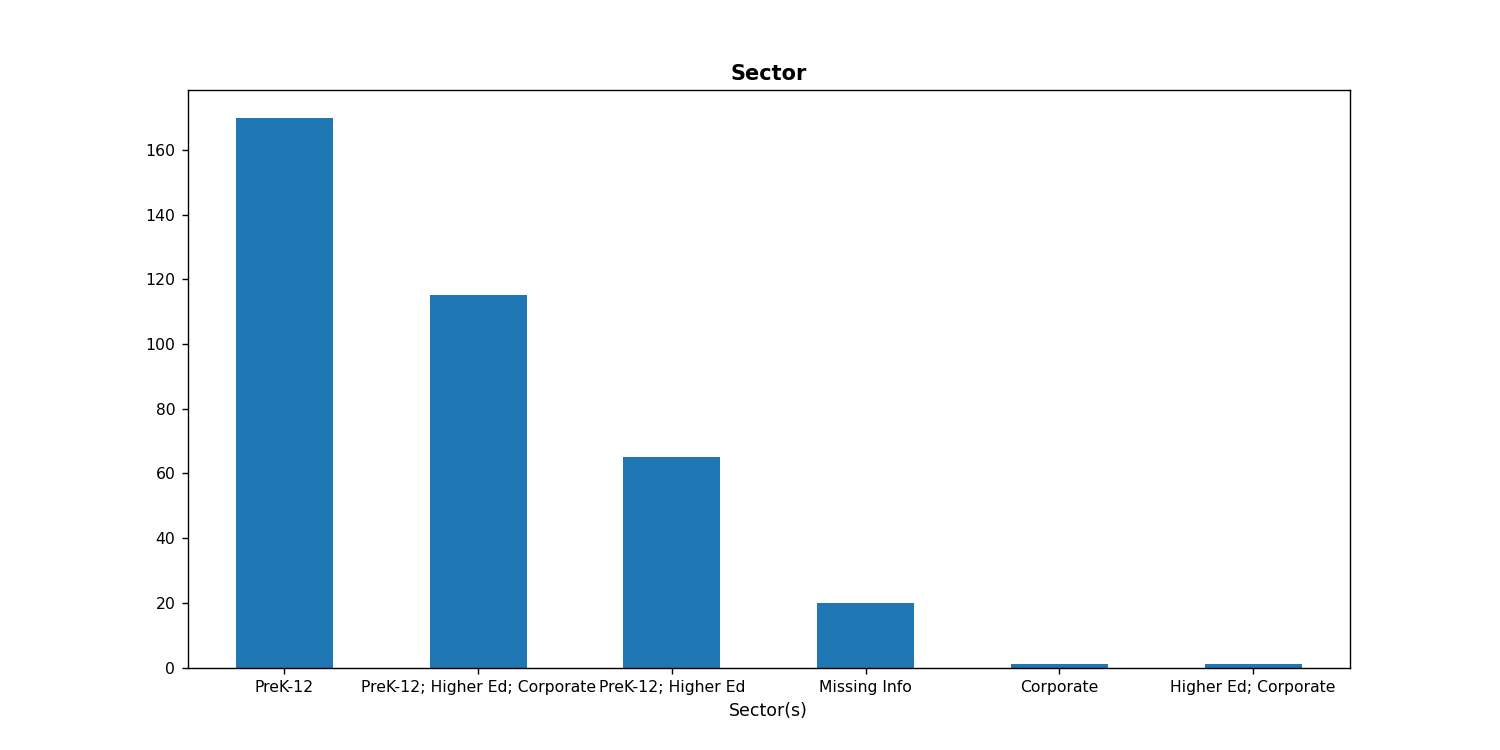

In [34]:
%matplotlib notebook

products_df['Sector(s)'].value_counts().plot(kind= 'bar', figsize= (12,6), fontsize= 9)
plt.title('Sector', fontsize= 12, fontweight= 'bold')
plt.xticks(rotation=0)
plt.show()

In [35]:
products_df['Primary Essential Function'].value_counts()

Primary Essential Function
LC - Digital Learning Platforms                                              74
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study Tools                                                             25
Missing Info                                                                 20
LC - Courseware & Textbooks                                                  18
LC - Sites, Resources & Reference - Games & Simulations                      18
LC/CM/SDO - Other                                                            16
LC - Sites, Resources & Reference - Digital Collection & Repository          15
CM - Classroom Engagement & Instruction - Classroom Management               11
LC - Sites, Resources & Reference - Streaming Services                        9
CM - Virtual Classroom - Video Conferencing & Screen Sharing                  7
LC - Study To

<IPython.core.display.Javascript object>


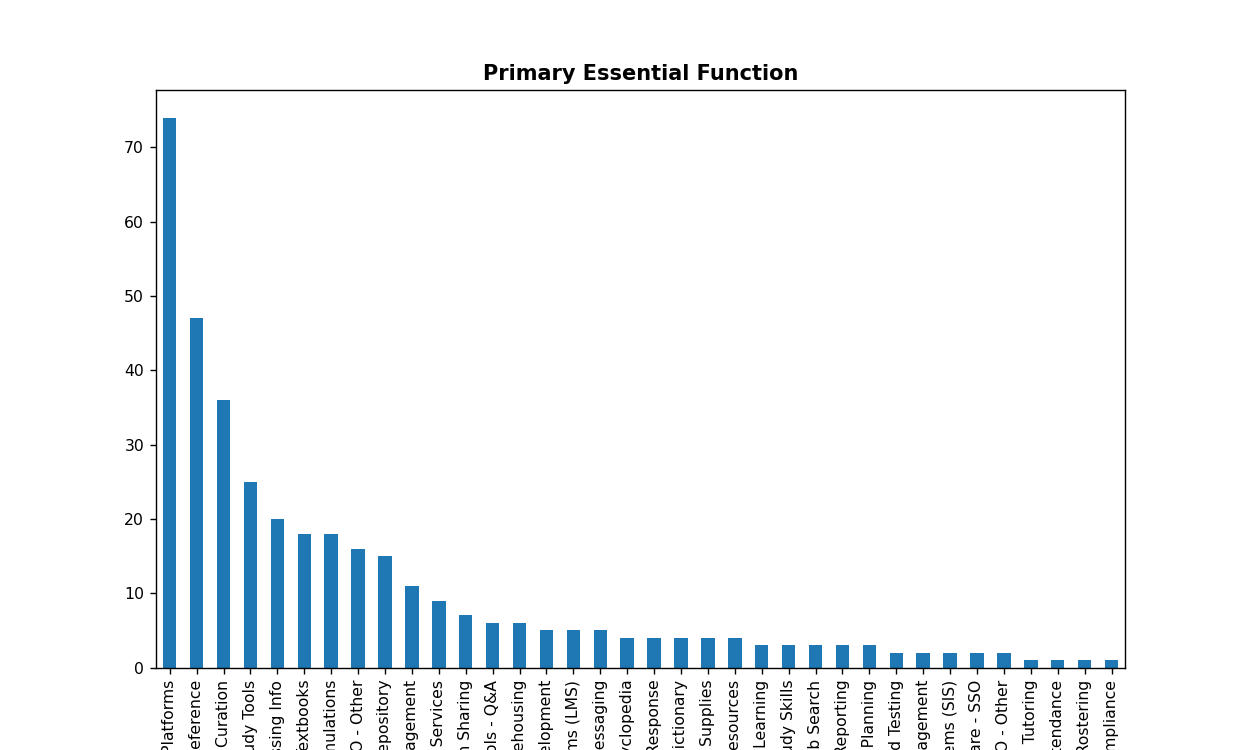

In [36]:
%matplotlib notebook

products_df['Primary Essential Function'].value_counts().plot(kind= 'bar', figsize= (10,6), fontsize= 9)
plt.ylabel(' ')
plt.title('Primary Essential Function', fontsize= 12, fontweight= 'bold')
plt.show()

In [37]:
#modify "LP ID" column name to "lp_id"

products_df.rename(columns={'LP ID': 'lp_id'}, inplace=True)
products_df.head(1)

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,product category1,product category2,product category3,Sector1,Sector2,Sector3
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,None,PreK-12,None,None


# 3- Engagement data


## 3.1- Import and Explore Engagement

In [61]:
import glob
all_files = glob.glob("*.csv")

li = []

for filename in all_files:
    eng_df = pd.read_csv(filename, index_col=None, header=0)
    district_id=filename
    eng_df["district_id"] = district_id
    li.append(eng_df)
    
eng_df = pd.concat(li)
eng_df = eng_df.reset_index(drop=True)
eng_df.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,93690.0,0.00,NaN,1000.csv
1,2020-01-01,17941.0,0.03,0.90,1000.csv
2,2020-01-01,65358.0,0.03,1.20,1000.csv
3,2020-01-01,98265.0,0.57,37.79,1000.csv
4,2020-01-01,59257.0,0.00,NaN,1000.csv


In [62]:
eng_df.shape

(22324190, 5)

In [63]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       object 
dtypes: float64(3), object(2)
memory usage: 851.6+ MB


## 3.2- Engagement data frame cleaning
     -change time column data type into datetime
     -change lp_id column data type to string
     -check missing values and deal with them
     -delete the ".csv" part from the district_id column

In [64]:
#change time column data type into datetime

eng_df['time']= pd.to_datetime(eng_df['time'])
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             float64       
 2   pct_access        float64       
 3   engagement_index  float64       
 4   district_id       object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 851.6+ MB


In [65]:
#change lp_id column data type to string

eng_df['lp_id']= eng_df['lp_id'].astype('str')
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             object        
 2   pct_access        float64       
 3   engagement_index  float64       
 4   district_id       object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 851.6+ MB


In [66]:
#check missing values and deal with them

eng_df.isnull().sum()

time                      0
lp_id                     0
pct_access            13447
engagement_index    5378409
district_id               0
dtype: int64

In [44]:
!pip install missingno

<IPython.core.display.Javascript object>


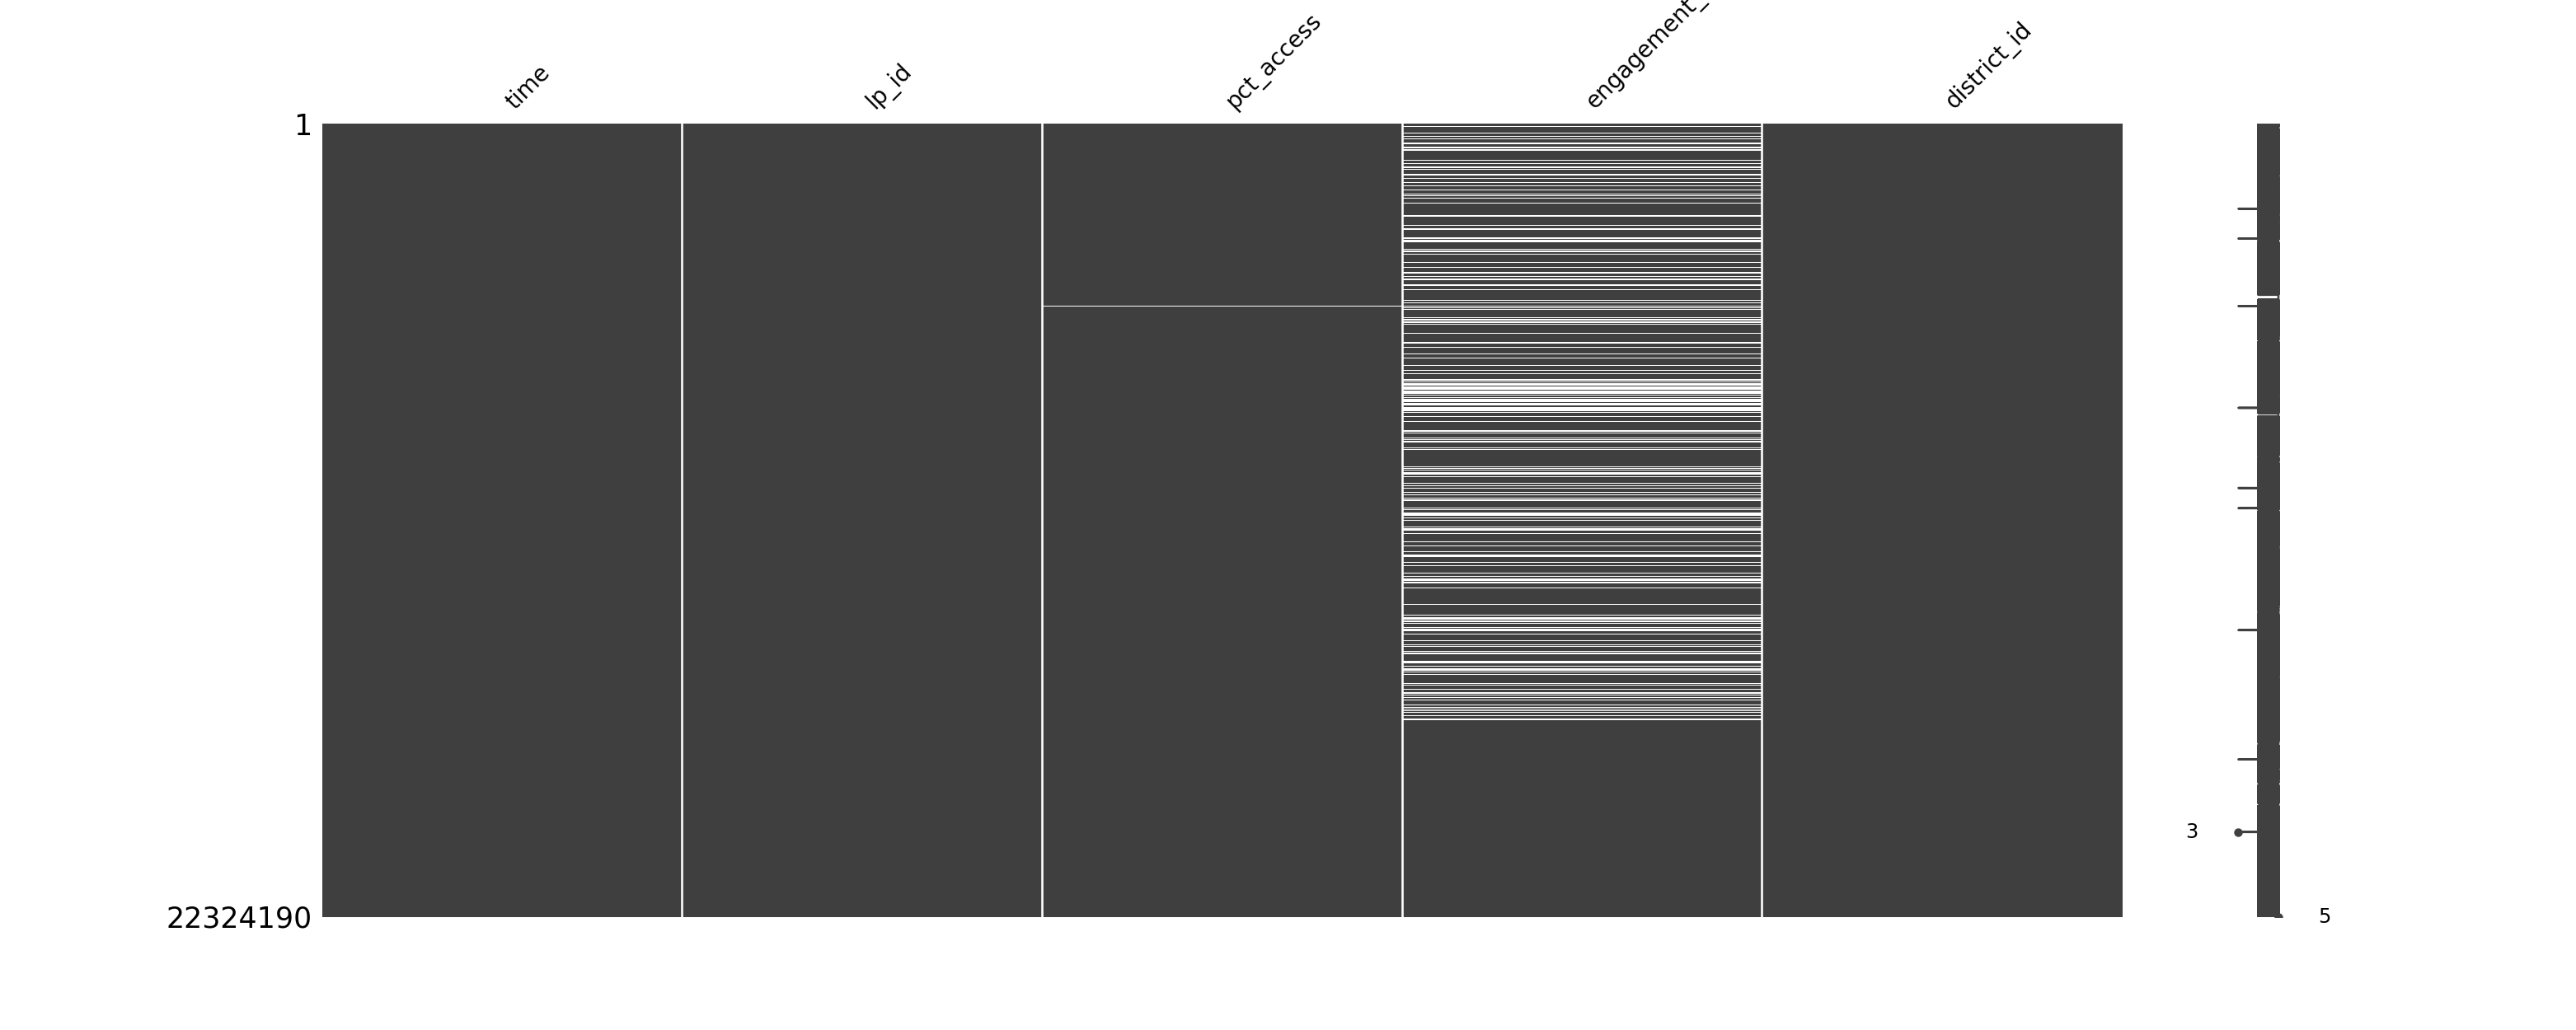

In [47]:
import missingno as msno

msno.matrix(eng_df)
plt.show()

In [67]:
perc= 40.0
min_count = int(((100-perc)/100)*eng_df.shape[1]+1)
eng_df = eng_df.dropna (axis=0, thresh=min_count)

eng_df.isnull().sum()

time                      0
lp_id                     0
pct_access                0
engagement_index    5364962
district_id               0
dtype: int64

In [68]:
eng_df['engagement_index'] = eng_df['engagement_index'].fillna(0)
eng_df.isnull().sum()

time                0
lp_id               0
pct_access          0
engagement_index    0
district_id         0
dtype: int64

In [69]:
#delete the ".csv" part from the district_id column

eng_df['district_id'] = eng_df['district_id'].map(lambda x: x.rstrip('.csv'))
eng_df.head(5)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,93690.0,0.00,0.00,1000
1,2020-01-01,17941.0,0.03,0.90,1000
2,2020-01-01,65358.0,0.03,1.20,1000
3,2020-01-01,98265.0,0.57,37.79,1000
4,2020-01-01,59257.0,0.00,0.00,1000


# 4- Now, we have 3 dataframe
     1-districts_df 
     2-products_df
     3-eng_df

In [70]:
print(districts_df.columns)
print(products_df.columns)
print(eng_df.columns)

Index(['district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'],
      dtype='object')
Index(['lp_id', 'URL', 'Product Name', 'Provider/Company Name', 'Sector(s)',
       'Primary Essential Function', 'product category1', 'product category2',
       'product category3', 'Sector1', 'Sector2', 'Sector3'],
      dtype='object')
Index(['time', 'lp_id', 'pct_access', 'engagement_index', 'district_id'], dtype='object')


## 4.1- we will join the "district" and "engagement" dataframes on "district_id"

In [71]:
all_df= pd.merge(districts_df, eng_df, how= 'inner', on= 'district_id')
all_df.head(3)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-01-27,32213.0,100.00,3000.00
1,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-25,90153.0,33.33,2666.67
2,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-25,99916.0,0.00,0.00


In [72]:
all_df.shape

(17428382, 11)

## 4.2- we will join new dataframe with the "products_df" on "lp_id" column

In [73]:
all_df['lp_id'] = all_df['lp_id'].map(lambda x: x.rstrip('.0'))
all_df.head(3)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-01-27,32213,100.00,3000.00
1,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-25,90153,33.33,2666.67
2,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-25,99916,0.00,0.00


## 4.3- Merge and display 3 dataframes together 

In [74]:
final_df = pd.merge(all_df, products_df, how= 'inner', on= 'lp_id')
final_df.head(3)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,...,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,product category1,product category2,product category3,Sector1,Sector2,Sector3
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-01-27,32213,100.00,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate
1,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-26,32213,25.00,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate
2,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-27,32213,73.26,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate


In [75]:
print(final_df.shape)
print(final_df.columns)

(8273142, 22)
Index(['district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw', 'time',
       'lp_id', 'pct_access', 'engagement_index', 'URL', 'Product Name',
       'Provider/Company Name', 'Sector(s)', 'Primary Essential Function',
       'product category1', 'product category2', 'product category3',
       'Sector1', 'Sector2', 'Sector3'],
      dtype='object')


In [76]:
#rename columns

final_df= final_df.rename(columns= {'district_id':'District_ID','state':'State' , 'locale':'Locale', 
                                    'pct_black/hispanic':'Percentage_black/hispanic',
                                    'pct_free/reduced': 'Percentage_eligible_free',
                                    'county_connections_ratio': 'Residential_connection',
                                    'pp_total_raw': 'Per-pupil_expenditure','time':'Time', 'lp_id':'Product_ID',
                                    'pct_access': 'Percentage Student Access', 'engagement_index':'Engagement_Index' })

In [77]:
final_df.head(2)

,District_ID,State,Locale,Percentage_black/hispanic,Percentage_eligible_free,Residential_connection,Per-pupil_expenditure,Time,Product_ID,Percentage Student Access,...,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,product category1,product category2,product category3,Sector1,Sector2,Sector3
0,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-01-27,32213,100.0,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate
1,8815,Illinois,Suburb,0%-20%,0%-20%,18%-100%,14000-16000,2020-02-26,32213,25.0,...,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),SDO,Learning Management Systems (LMS),None,PreK-12,Higher Ed,Corporate


# Finally: save the final data frame to csv file

In [78]:
#save the final data frame to csv file

final_df.to_csv('final_Covid19_df.csv')

 ###  .
      .
      .




On the next page, we will engage with this data frame ('final_Covid19_df.csv'), conducting visualizations and extracting insights